http://localhost:5441/?token=""

In [ ]:
print("hello world")

<!-- # http://localhost:5441/?token="" -->

In [ ]:
import torch

In [2]:
2 ** 31

2147483648

In [3]:
torch.tensor(2**31, dtype=torch.int64)

tensor(2147483648)

In [5]:
torch.tensor(2**31, dtype=torch.int32) # number too large for 32 bits

RuntimeError: value cannot be converted to type int32 without overflow

In [6]:
x = torch.tensor(2**31-1, dtype=torch.int32)

In [10]:
y = x+1 # overflow
y

tensor(-2147483648, dtype=torch.int32)

# Float behavior (python is using float64 here)

In [ ]:
from sys import float_info

In [9]:
y - 1 # underflow

tensor(2147483647, dtype=torch.int32)

In [13]:
float_info.max

1.7976931348623157e+308

In [14]:
float_info.min

2.2250738585072014e-308

In [18]:
big = float_info.max
small = -big

In [16]:
big + 1 == big

True

In [17]:
big * 2

inf

In [19]:
small * 3 

-inf

In [20]:
big*2 + small*2

nan

In [21]:
float_info.dig

15

In [24]:
x = 1.23456789123456
y = 1.23456789123458
x == y

False

In [26]:
x = 1.2345678912345691
y = 1.2345678912345682
x == y

False

In [27]:
x = 1.0
x + float_info.epsilon # the next number after 1.0

1.0000000000000002

# Matrices

In [34]:
torch.manual_seed(544)

A = torch.rand(10, 3, dtype=torch.float64)
A

tensor([[0.1533, 0.1232, 0.9056],
        [0.5199, 0.6170, 0.6824],
        [0.2492, 0.5415, 0.8858],
        [0.1500, 0.4240, 0.6733],
        [0.9385, 0.5420, 0.6034],
        [0.0621, 0.2434, 0.6214],
        [0.9699, 0.5216, 0.4529],
        [0.9302, 0.9436, 0.2137],
        [0.0547, 0.7348, 0.1622],
        [0.2091, 0.1147, 0.6165]], dtype=torch.float64)

In [35]:
A.device # "cpu" means the main system memory (RAM)

device(type='cpu')

In [36]:
A.shape

torch.Size([10, 3])

In [37]:
A.dtype

torch.float64

In [39]:
torch.cuda.is_available()

False

In [49]:
# A.to("cuda")

In [50]:
A.T # transpose

tensor([[0.1533, 0.5199, 0.2492, 0.1500, 0.9385, 0.0621, 0.9699, 0.9302, 0.0547,
         0.2091],
        [0.1232, 0.6170, 0.5415, 0.4240, 0.5420, 0.2434, 0.5216, 0.9436, 0.7348,
         0.1147],
        [0.9056, 0.6824, 0.8858, 0.6733, 0.6034, 0.6214, 0.4529, 0.2137, 0.1622,
         0.6165]], dtype=torch.float64)

In [51]:
A.reshape(2,15)

tensor([[0.1533, 0.1232, 0.9056, 0.5199, 0.6170, 0.6824, 0.2492, 0.5415, 0.8858,
         0.1500, 0.4240, 0.6733, 0.9385, 0.5420, 0.6034],
        [0.0621, 0.2434, 0.6214, 0.9699, 0.5216, 0.4529, 0.9302, 0.9436, 0.2137,
         0.0547, 0.7348, 0.1622, 0.2091, 0.1147, 0.6165]], dtype=torch.float64)

In [52]:
A.reshape(30)

tensor([0.1533, 0.1232, 0.9056, 0.5199, 0.6170, 0.6824, 0.2492, 0.5415, 0.8858,
        0.1500, 0.4240, 0.6733, 0.9385, 0.5420, 0.6034, 0.0621, 0.2434, 0.6214,
        0.9699, 0.5216, 0.4529, 0.9302, 0.9436, 0.2137, 0.0547, 0.7348, 0.1622,
        0.2091, 0.1147, 0.6165], dtype=torch.float64)

In [53]:
A.nelement()

30

In [54]:
A.element_size()

8

In [55]:
A.nelement() * A.element_size() # how much memory used

240

In [57]:
# extra memory that we'll ignore
import sys
sys.getsizeof(A)
# actually total memory
sys.getsizeof(A) + A.nelement()*A.element_size()

320

# Calculations

In [59]:
X = torch.rand(5,3)
X

tensor([[0.5678, 0.4897, 0.3131],
        [0.8285, 0.1607, 0.7355],
        [0.2376, 0.7282, 0.3496],
        [0.3460, 0.2158, 0.4502],
        [0.8328, 0.6779, 0.9792]])

In [60]:
X + 100

tensor([[100.5678, 100.4897, 100.3131],
        [100.8285, 100.1607, 100.7355],
        [100.2376, 100.7282, 100.3496],
        [100.3460, 100.2158, 100.4502],
        [100.8328, 100.6779, 100.9792]])

In [65]:
torch.sigmoid(torch.tensor(0))

tensor(0.5000)

In [66]:
torch.arange(-5,6,1)

tensor([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [67]:
torch.sigmoid(torch.arange(-5,6,1))

tensor([0.0067, 0.0180, 0.0474, 0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 0.9526,
        0.9820, 0.9933])

In [68]:
x = torch.rand(5,3)
y = torch.rand(3,7)
z = torch.rand(7,1)

# matrix multiply
x @ y @ z

tensor([[1.7950],
        [2.7175],
        [3.3303],
        [1.3302],
        [1.1815]])

# Optimization

```
a = torch.tensor(3.0)
b = torch.tensor(4.0)
c = torch.tensor(5.0)
```

```
z = 2 * (a-b) + c
```

we want to maximize z, and b is a variable here

So, we are going calculate the gradient of b (slope) dz/db

In [102]:
import torch

a = torch.tensor(3.0)
b = torch.tensor(4.0, requires_grad=True)
c = torch.tensor(5.0)

z = 2 * (a-b) + c

optimizer = torch.optim.SGD([b], maximize=True, lr=0.1)

In [103]:
z = 2 * (a-b) + c
z.backward()
b.grad, b

(tensor(-2.), tensor(4., requires_grad=True))

In [108]:
optimizer.step()    # will make b a little bigger or smaller,
                    # depending on gradient and whether we are
                    # maximizing or minimizing
optimizer.zero_grad() # resets the grad of b
b.grad, b

(None, tensor(3.2000, requires_grad=True))

In [109]:
z = 2 * (a-b) + c
z.backward() # calculates the gradients
b.grad, b

(tensor(-2.), tensor(3.2000, requires_grad=True))

In [110]:
optimizer.step()

In [111]:
z = 2 * (a-b) + c
z.backward()
b.grad, b

(tensor(-4.), tensor(3.0000, requires_grad=True))

In [120]:
# Final version

import torch

a = torch.tensor(3.0)
b = torch.tensor(4.0, requires_grad=True)
c = torch.tensor(5.0)

optimizer = torch.optim.SGD([b], maximize=True, lr=0.1)
# z = 2 * (a-b) + c

for epoch in range(10):
    z = 2 * (a-b) + c
    z.backward() 

    print(z.item(), b.item(), b.grad)

    optimizer.step()
    optimizer.zero_grad()

z = 2 * (a-b) + c
print("Result:", z.item(), b.item())

3.0 4.0 tensor(-2.)
3.4000000953674316 3.799999952316284 tensor(-2.)
3.8000001907348633 3.5999999046325684 tensor(-2.)
4.200000286102295 3.3999998569488525 tensor(-2.)
4.600000381469727 3.1999998092651367 tensor(-2.)
5.000000476837158 2.999999761581421 tensor(-2.)
5.40000057220459 2.799999713897705 tensor(-2.)
5.8000006675720215 2.5999996662139893 tensor(-2.)
6.200000762939453 2.3999996185302734 tensor(-2.)
6.600000858306885 2.1999995708465576 tensor(-2.)
Result: 7.000000953674316 1.9999995231628418


## Class demo

In [121]:
import matplotlib.pyplot as plt

tensor(0., requires_grad=True) tensor(36., grad_fn=<MulBackward0>)
tensor(-24.)
tensor(2.4000, requires_grad=True)


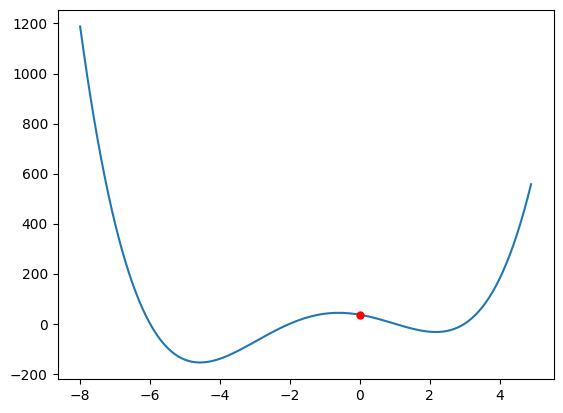

In [129]:
def f(x):
    return (x-1) * (x+2) * (x-3) * (x+6)

x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x,y)

# find the minimum

x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)

y = f(x)
print(x, y)
plt.plot(x.detach(), y.detach(), "ro", markersize=5)

y.backward()
print(x.grad)
optimizer.step()
print(x)

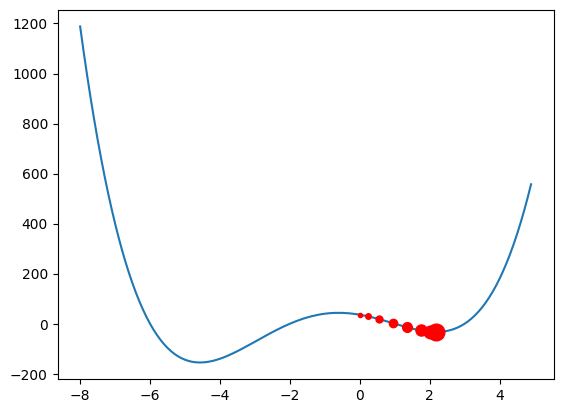

In [141]:
# Final version

def f(x):
    return (x-1) * (x+2) * (x-3) * (x+6)

# plot f(x)
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x,y)


# find the minimum

x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01) # lr=0.1

for epoch in range(10):
    y = f(x)
    y.backward()
    plt.plot(x.detach(), y.detach(), "ro", markersize=3+epoch)

    optimizer.step()
    optimizer.zero_grad()

# Train a model

<Axes: xlabel='petlen', ylabel='petwid'>

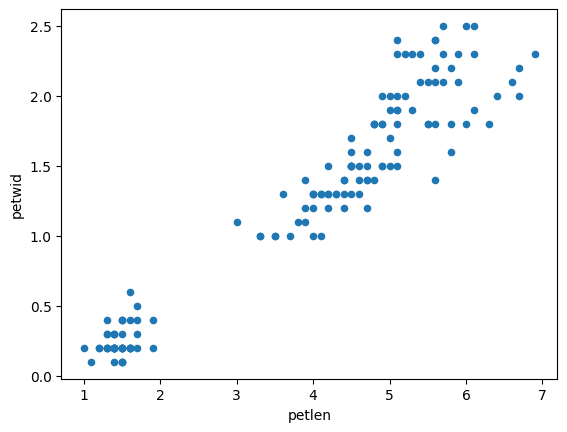

In [142]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["seplen", "sepwid", "petlen", "petwid", "variety"])
df.plot.scatter(x="petlen", y="petwid")


In [143]:
df

,seplen,sepwid,petlen,petwid,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [146]:
torch.tensor(df.loc[:, "seplen":"petwid"].values);

In [149]:
df.loc[:, ["petwid"]].values;

In [151]:
ds = torch.utils.data.TensorDataset(
    torch.tensor(df.loc[:, "seplen":"petlen"].values),
    torch.tensor(df.loc[:, ["petwid"]].values)
)

In [152]:
X, Y = ds[:5]

In [153]:
X, Y

(tensor([[5.1000, 3.5000, 1.4000],
         [4.9000, 3.0000, 1.4000],
         [4.7000, 3.2000, 1.3000],
         [4.6000, 3.1000, 1.5000],
         [5.0000, 3.6000, 1.4000]], dtype=torch.float64),
 tensor([[0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000]], dtype=torch.float64))

In [155]:
train, test = torch.utils.data.random_split(ds, [0.75, 0.25])

In [156]:
dl = torch.utils.data.DataLoader(train, batch_size=5, shuffle=True)

In [159]:
for batchX, batchY in dl:
    print(batchX, batchY)
    break

tensor([[5.8000, 4.0000, 1.2000],
        [5.2000, 3.4000, 1.4000],
        [6.9000, 3.1000, 5.4000],
        [5.5000, 2.3000, 4.0000],
        [6.4000, 2.7000, 5.3000]], dtype=torch.float64) tensor([[0.2000],
        [0.2000],
        [2.1000],
        [1.3000],
        [1.9000]], dtype=torch.float64)


In [160]:
batchX.shape

torch.Size([5, 3])

In [162]:
# batchX @ coef + bias 

In [163]:
batchY.shape

torch.Size([5, 1])

In [167]:
coef = torch.zeros((3,1), dtype=torch.float64)
batchX @ coef

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=torch.float64)

In [168]:
batchY 

tensor([[0.2000],
        [0.2000],
        [2.1000],
        [1.3000],
        [1.9000]], dtype=torch.float64)

In [174]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD([coef], lr=0.1)
coef = torch.zeros((3,1), dtype=torch.float64, requires_grad=True)


predictions = batchX @ coef
loss = loss_fn(predictions, batchY)
print(loss)

loss.backward()
print(coef.grad)
optimizer.step()
print(coef)

tensor(1.9580, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor([[-14.4000],
        [ -6.4440],
        [-10.8520]], dtype=torch.float64)
tensor([[0.],
        [0.],
        [0.]], dtype=torch.float64, requires_grad=True)


In [186]:
coef = torch.zeros((3,1), dtype=torch.float64)
X, Y = train[:]
loss_fn(X @ coef, Y)

tensor(1.9151, dtype=torch.float64)

In [190]:
# Final version
torch.manual_seed(544)

loss_fn = torch.nn.MSELoss()
coef = torch.zeros((3,1), dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD([coef], lr=0.001)

for epoch in range(100):
    for batchX, batchY in dl:
        predictions = batchX @ coef
        loss = loss_fn(predictions, batchY)    
        # print(loss)
        loss.backward()     # computes gradient, and adds it to coef.grad
        
        optimizer.step()
        optimizer.zero_grad()
    X, Y = train[:]
    print(loss_fn(X @ coef, Y))

tensor(0.2823, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.2422, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.2106, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1816, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1599, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1409, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1255, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1121, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1002, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0920, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0843, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0780, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0736, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0686, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0649, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0621, dtype=torch.float64, grad

In [194]:
# evaluate on test
X, Y = test[:]
predictions = X @ coef
print(loss_fn(predictions, Y))

tensor(0.0479, dtype=torch.float64, grad_fn=<MseLossBackward0>)
